In [40]:
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
my_dataset= pd.read_csv('/Users/dslearner23/Downloads/segmentation_data.csv')

In [42]:
my_dataset.keys()

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [54]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# create scaler object
scaler = StandardScaler()

# scale the data
X_scaled = scaler.fit(my_dataset)

In [55]:
scaled_data=scaler.transform(my_dataset)
scaled_data

array([[-1.731185  , -0.91739884, -0.99302433, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [-1.72945295,  1.09003844,  1.00702467, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-1.7277209 , -0.91739884, -0.99302433, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [ 1.7277209 , -0.91739884, -0.99302433, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.72945295,  1.09003844,  1.00702467, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [ 1.731185  , -0.91739884, -0.99302433, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

TO REDUCE DIMENSTION INTO 2

In [56]:
from sklearn.decomposition import PCA

In [58]:
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [59]:
x_pca=pca.transform(scaled_data)

In [60]:
scaled_data.shape

(2000, 8)

In [61]:
x_pca.shape

(2000, 2)

In [62]:
x_pca

array([[ 2.85978214,  0.93667597],
       [ 0.94413038,  0.39449213],
       [-0.02303213, -0.8817974 ],
       ...,
       [-1.84179778, -2.15868138],
       [-2.71683211,  0.56139001],
       [-2.2097949 , -2.42344957]])

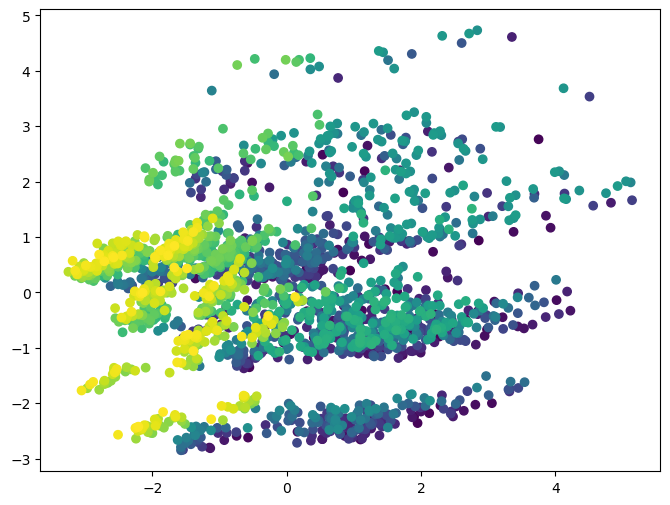

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=my_dataset['ID'])